# Practice 3. PoseNet with Robot-Season Dataset & Apperance Change

**1. Import required library**

필요한 라이브러리를 호출합니다.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from posenet import GoogLeNet as PoseNet
from utils import *
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))


**2. Set project directory & dataset path**

 현재 작업 폴더 및 데이터셋에 대한 경로를 설정합니다.

In [2]:
# Set this path to your project directory
path = './'
# Set this path to your dataset directory
#directory = './SK_VisualLocalization_Test_Dataset/Seasons_Example/'
directory = './SK_VisualLocalization_Test_Dataset/Day-Night_Example/'
dataset = 'dataset_test.txt'

**3. Load test images**

작업에 필요한 이미지들을 읽어오고, 해당 이미지들을 네트워크에 넣어주기 전 필요한 Pre-processing을 수행합니다.
 PoseNet에 사용되는 네트워크는 GoogLeNet에 기반을 두고, GoogLeNet의 input의 경우, 224x224x3으로 고정되어 있기에,
 이미지에 적용되는 Pre-processing은 이미지를 resize하고, 224x224로 center crop을 수행합니다. 

In [3]:
image = tf.placeholder(tf.float32, [1, 224, 224, 3])
datasource = get_data(directory,dataset)
results = np.zeros((len(datasource.images),2))

100%|██████████| 9/9 [00:00<00:00, 2325.86it/s]


**4. Construct network**

 PoseNet 네트워크에 대한 초기화 및 받아오고자 하는 출력 값을 설정하여 줍니다.

In [4]:
net = PoseNet({'data': image})
p3_x = net.layers['cls3_fc_pose_xyz']
p3_q = net.layers['cls3_fc_pose_wpqr']

In [5]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

**5. Run the network & Evaluate the resutls**

 생성된 PoseNet의 weight로서 pre-trained 된 weight를 읽어옵니다.
 그 후, 데이터 셋에서 이미지를 하나씩 feed forward 시키고, 예측된 쿼터니언과 translation 결과를 출력합니다.

INFO:tensorflow:Restoring parameters from ./PoseNet.ckpt
Example/Day_Night_1_1.jpg  Predicted_XYZ (m):  [ 23.56 -21.73 2.79  Predicted_Euler_XYZ (degrees):  [ 65.54 -7.14 2.28 ]
Example/Day_Night_1_2.jpg  Predicted_XYZ (m):  [ 3.76 -15.13 2.78  Predicted_Euler_XYZ (degrees):  [ 73.14 -32.23 2.78 ]
Example/Day_Night_2_1.jpg  Predicted_XYZ (m):  [ 18.05 -22.70 2.45  Predicted_Euler_XYZ (degrees):  [ 66.96 -14.46 0.04 ]
Example/Day_Night_2_2.jpg  Predicted_XYZ (m):  [ 17.70 -20.32 2.98  Predicted_Euler_XYZ (degrees):  [ 77.14 -7.02 -2.06 ]
Example/Day_Night_3_1.jpg  Predicted_XYZ (m):  [ 15.98 -17.40 2.05  Predicted_Euler_XYZ (degrees):  [ 72.79 2.27 -1.58 ]
Example/Day_Night_3_2.jpg  Predicted_XYZ (m):  [ 10.57 -16.36 2.52  Predicted_Euler_XYZ (degrees):  [ 79.87 -11.72 0.92 ]
Example/Day_Night_3_3.jpg  Predicted_XYZ (m):  [ 9.57 -16.85 2.24  Predicted_Euler_XYZ (degrees):  [ 78.13 -13.10 0.54 ]
Example/Day_Night_4_1.jpg  Predicted_XYZ (m):  [ -10.77 -12.88 1.86  Predicted_Euler_XYZ (deg

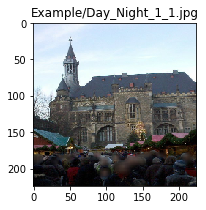

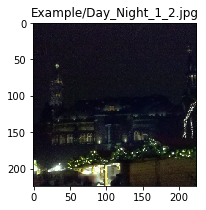

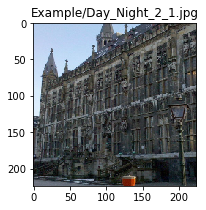

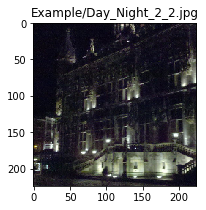

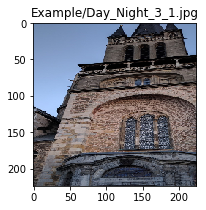

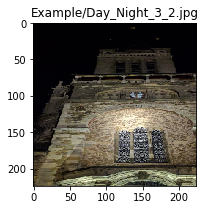

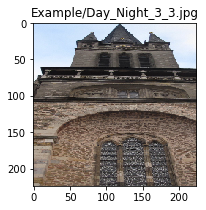

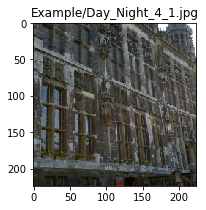

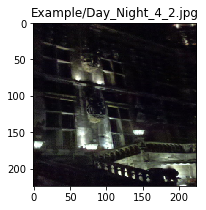

In [6]:
with tf.Session() as sess:
	# Load the data
	sess.run(init)
	saver.restore(sess, path + 'PoseNet.ckpt')
	data_gen = gen_data_batch(datasource)
	for i in range(len(datasource.images)):
		np_image = datasource.images[i]
		feed = {image: np_image}

		predicted_x, predicted_q = sess.run([p3_x, p3_q], feed_dict=feed)
		predicted_q = np.squeeze(predicted_q)
		predicted_x = np.squeeze(predicted_x)
        
		predicted_euler = quaternion_to_euler(predicted_q[1],predicted_q[2],predicted_q[3],predicted_q[0])
		plt.figure(figsize=(3,3))
		plt.title(datasource.names[i])
		plt.imshow(np.squeeze(datasource.images_cropped[i]))

		print (datasource.names[i], ' Predicted_XYZ (m): ','[', format(predicted_x[0],".2f") , format(predicted_x[1],".2f") , format(predicted_x[2],".2f"), ' Predicted_Euler_XYZ (degrees): ','[', format(predicted_euler[0],".2f") , format(predicted_euler[1],".2f") , format(predicted_euler[2],".2f"), ']')
